# Milestone 1: Data Preprocessing and Visualization Techniques

This notebook provides a method of reading images from a local file system and preprocesses the images into a NumPy format.

This notebook also shares a quick method to visualize train / validation / test data distribution and methods to ensure data sanity is preserved when converting data from different formats to a machine learning pipeline.

## Mounting Data from Google Drive

If you are running this notebook on Colab and you would like to mount data from Google Drive, you can run the cell below and check if you are able to view the contents inside the `Data` folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls './drive/My Drive/Data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
bmw10_annos.mat  cars_swift_wr.zip   test_poker.csv	  train_santander.csv
bmw10_ims	 higgs.csv.gz	     train_covertype.csv  val_covertype.csv
cars		 test_covertype.csv  train_poker.csv.gz   val_santander.csv


## Download Images 

Kaggle hosts the images needed for the milestones for this liveProject. We will use the [Cars dataset](https://www.kaggle.com/ajaykgp12/cars-wagonr-swift/version/2) which can either be downloaded directly from the link or by installing the `kaggle` library locally (`pip install kaggle`) and running `kaggle download <dataset-name>`. More information about downloading using CLI is available at [Kaggle datasets from command line](https://github.com/Kaggle/kaggle-api).

In [2]:
!ls './drive/My Drive/Data/cars/train/'

swift  wagonr


## Import Statements

These are the libraries that would be needed to run this notebook. If you miss any of the libraries below, you can run it by creating a new cell and the following command:
```!pip install <library-name>```

In [0]:
from collections import Counter
# Image processing library methods
from cv2 import imread, resize, cvtColor, COLOR_BGR2RGB
from glob import glob
from random import randint
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Folder definitions
Let's define all the folder names to make references to the dataset easier in the notebook.

In [0]:
root_folder = "./drive/My Drive/Data"
class_names = ["swift", "wagonr"]
dataset_name = "cars"
train_folder = "train"
val_folder = "validation"
test_folder = "test"

In [6]:
def get_files_list(folder_name):
    '''Method to read the list of files from a folder'''
    files_list = []
    for class_name in class_names:
        for file_name in glob(f"{root_folder}/{dataset_name}/{folder_name}/{class_name}/*.jpg"):
            files_list.append(file_name)
            
    return files_list

train_list = get_files_list(train_folder)
print(f"Number of files in train folder: {len(train_list)}")

Number of files in train folder: 2400


In [7]:
val_list = get_files_list(val_folder)
print(f"Number of files in validation folder: {len(val_list)}")

Number of files in validation folder: 800


In [8]:
test_list = get_files_list(test_folder)
print(f"Number of files in test folder: {len(test_list)}")

Number of files in test folder: 800


In [0]:
# Defining some image dimension constants
new_w, new_h = 100, 100
n_channels = 3

In [0]:
def read_and_process_image(file_path, show_details=False):
  '''Reads the image from the file and folder name, resizes and preprocesses it'''
  # Read image using OpenCV 
  img = imread(file_path)

  if show_details: print(f"Shape: {img.shape}")  # Print only when needed

  # Resize the image to a constant width and height
  img = resize(img, (new_w, new_h))
  img = cvtColor(img, COLOR_BGR2RGB)
  # Normalize the image
  img = img / 255
  
  if show_details: print(f"Reshape: {img.shape}") # Print only when needed

  return img

Shape: (204, 272, 3)
Reshape: (100, 100, 3)


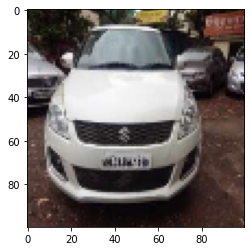

In [11]:
# Call the method to process the image 
img = read_and_process_image(train_list[10], show_details=True)

# Plots image inline due to the `matplotlib inline` command above
plt.imshow(img)

In [0]:
def show_images(images_list):
    '''Method for debugging and visualization of images'''
    n: int = len(images_list)
    f = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 4
    for i in range(columns*rows):
        image_path = images_list[randint(0, n - 1)]
        fol_name = image_path.split("/")[-2]
        # Debug, plot figure
        ax = f.add_subplot(rows, columns, i + 1)
        ax.set_title(fol_name)
        img = read_and_process_image(image_path)
        plt.axis('off')
        plt.imshow(img)

    plt.show(block=True)

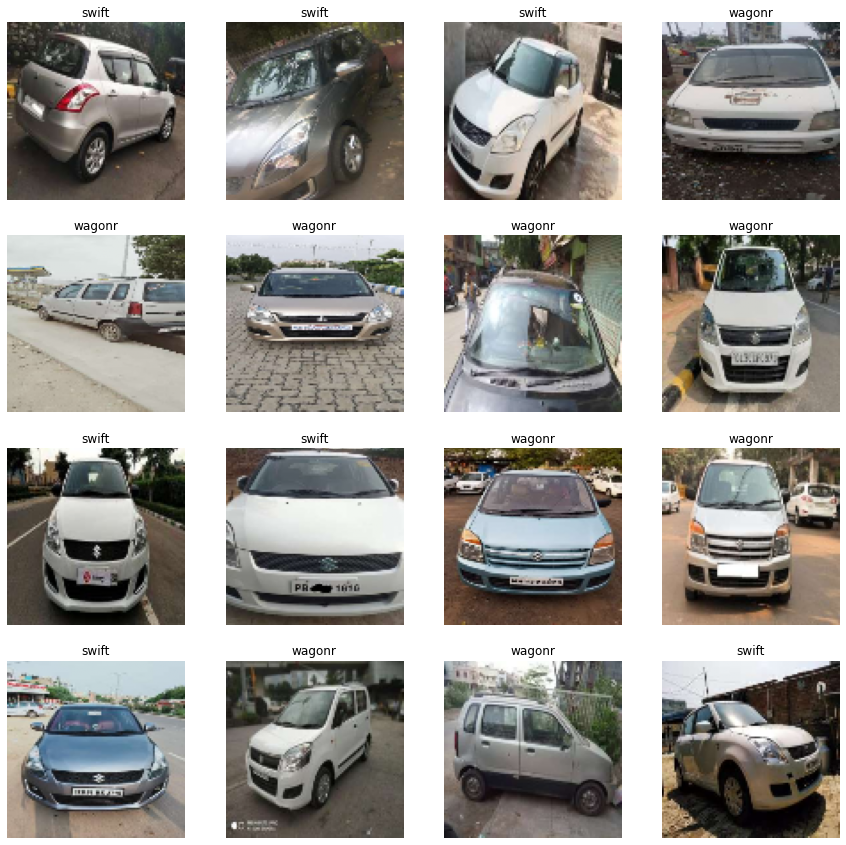

In [13]:
show_images(train_list)

## Visualization of Class Distribution

It is important to check the distribution of the train and test data. This would give an idea of the bias present in the data even before a classifier is trained.

In [0]:
def visualize_classes(image_path_list):
    '''Visualize the images using PyPlot'''
    image_class_list = []
    for image_path in image_path_list:
        fol_name = image_path.split("/")[-2]
        image_class_list.append(fol_name)

    image_class_counter = Counter(image_class_list)
    plt.bar(image_class_counter.keys(), image_class_counter.values())

    return image_class_list

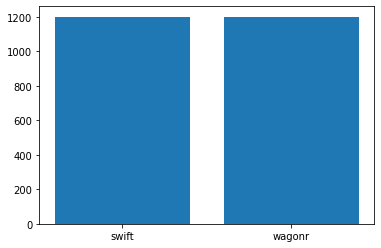

In [15]:
# Train data 
train_class_list = visualize_classes(train_list)

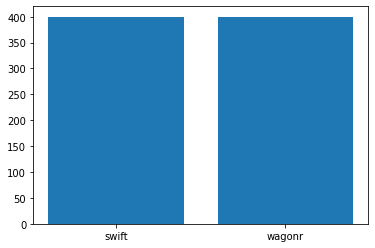

In [16]:
# Validation data 
val_class_list = visualize_classes(val_list)

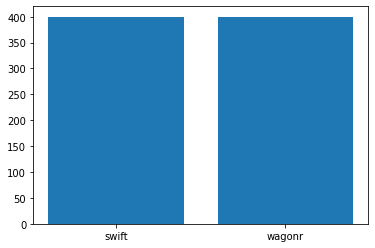

In [17]:
# Test data 
test_class_list = visualize_classes(test_list)

## Convert Data to NumPy

In [0]:
def prepare_numpy_image_array(image_path_list):
  '''Prepare a NumPy version of the image data for further usage in training'''
  images_numpy = np.zeros((len(image_path_list), new_w, new_h, n_channels))
  
  for idx in tqdm(range(len(image_path_list))):
    img = read_and_process_image(image_path_list[idx])
    images_numpy[idx, :, :, :] = img

  return images_numpy

In [19]:
train_images_numpy = prepare_numpy_image_array(train_list)
print(f"Train images shape: {train_images_numpy.shape}")

100%|██████████| 2400/2400 [12:15<00:00,  3.26it/s]

Train images shape: (2400, 100, 100, 3)


In [20]:
val_images_numpy = prepare_numpy_image_array(val_list)
print(f"Validation images shape: {val_images_numpy.shape}")

100%|██████████| 800/800 [05:19<00:00,  2.50it/s]

Validation images shape: (800, 100, 100, 3)


In [21]:
test_images_numpy = prepare_numpy_image_array(test_list)
print(f"Test images shape: {test_images_numpy.shape}")

100%|██████████| 800/800 [04:04<00:00,  3.27it/s]

Test images shape: (800, 100, 100, 3)


## Validate NumPy and Original Data

This step makes sure that the transformations that we have applied and the data that is converted into NumPy array are one and the same. We check various random example indices to ensure that the data sanity is preserved.

In [22]:
print(f"Range of pixel values in test images: [{np.amin(test_images_numpy)}, {np.amax(test_images_numpy)}]")

Range of pixel values in test images: [0.0, 1.0]


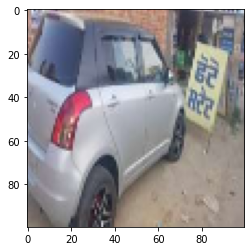

In [23]:
plt.imshow(test_images_numpy[100, :, :, :])

Shape: (132, 271, 3)
Reshape: (100, 100, 3)


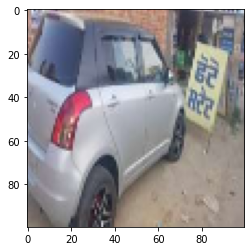

In [24]:
# Call the method to process the image 
img = read_and_process_image(test_list[100], show_details=True)

# Plots image inline due to the `matplotlib inline` command above
plt.imshow(img)

## Save to Pickle 

Pickling data ensures that all the preprocessing steps are preserved and the data is saved to local disk in the state at which we have processed it.

In [25]:
import pickle as pkl

pickle_path = f"{root_folder}/{dataset_name}/train_val_test_numpy.pkl"
pkl.dump([train_images_numpy, train_class_list, 
          val_images_numpy, val_class_list,
          test_images_numpy, test_class_list], 
         open(pickle_path, "wb"))
print(f"Saving NumPy arrays to {pickle_path}")

Saving NumPy arrays to ./drive/My Drive/Data/cars/train_val_test_numpy.pkl
